In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

C:\Users\USER\anaconda3\envs\cvpr\lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


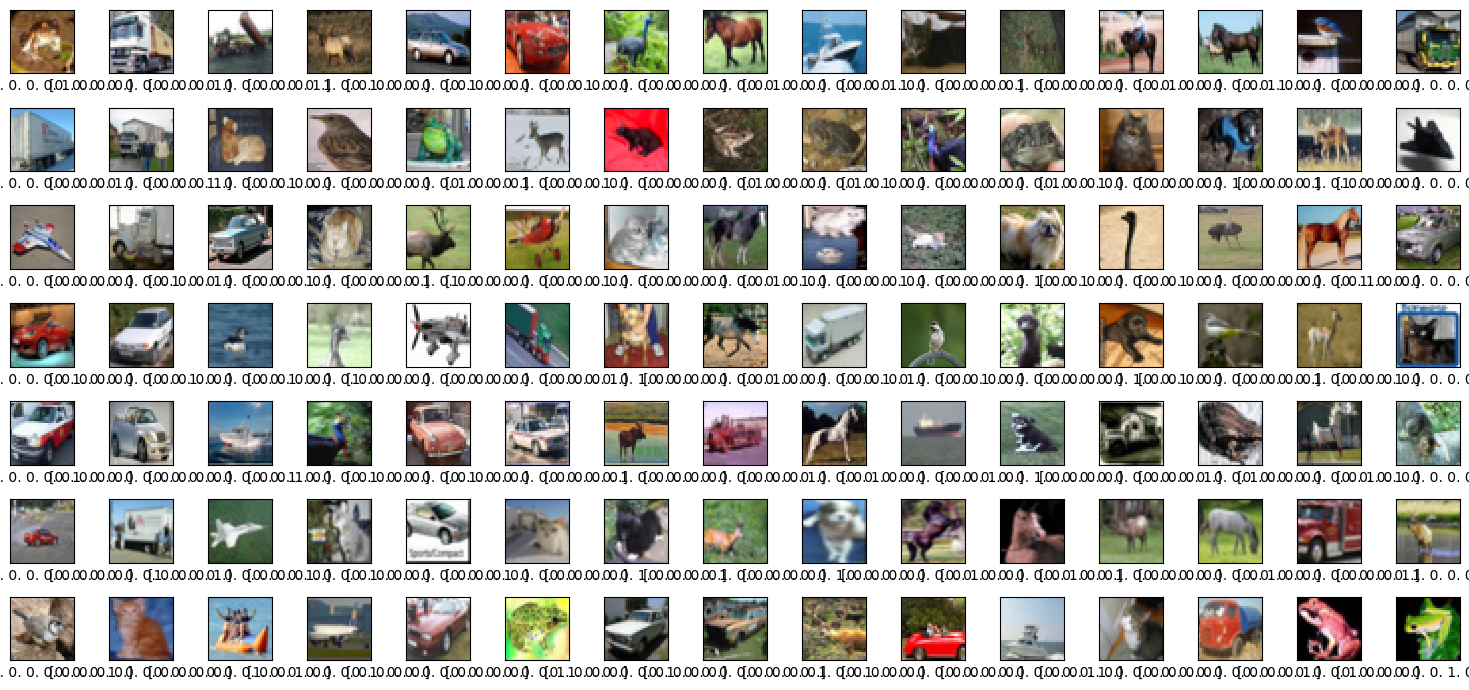

In [3]:
ROWS = 7
COLS = 15
i = 0

plt.figure(figsize=(15,7))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show()

In [4]:
def build_model():
    model = keras.Sequential([
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    return model
model = build_model()

In [5]:
model_sgd = build_model()
model_sgd.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    metrics=["accuracy"],
)

model_adam = build_model()
model_adam.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
)

model_rmsprop = build_model()
model_rmsprop.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=["accuracy"],
)

In [6]:
history_sgd = model_sgd.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)
history_adam = model_adam.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)
history_rmsprop = model_rmsprop.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

test_loss_sgd, test_acc_sgd = model_sgd.evaluate(x_test, y_test)
test_loss_adam, test_acc_adam = model_adam.evaluate(x_test, y_test)
test_loss_rmsprop, test_acc_rmsprop = model_rmsprop.evaluate(x_test, y_test)

print('Test set accuracy for SGD optimizer:', test_acc_sgd)
print('Test set accuracy for Adam optimizer:', test_acc_adam)
print('Test set accuracy for RMSprop optimizer:', test_acc_rmsprop)

Epoch 1/5
625/625 [==============================] - 29s 46ms/step - loss: 2.1551 - accuracy: 0.2104 - val_loss: 1.9747 - val_accuracy: 0.2990
Epoch 2/5
625/625 [==============================] - 30s 48ms/step - loss: 1.8592 - accuracy: 0.3393 - val_loss: 1.7613 - val_accuracy: 0.3780
Epoch 3/5
625/625 [==============================] - 32s 51ms/step - loss: 1.6586 - accuracy: 0.4084 - val_loss: 1.6068 - val_accuracy: 0.4202
Epoch 4/5
625/625 [==============================] - 37s 59ms/step - loss: 1.5262 - accuracy: 0.4581 - val_loss: 1.5173 - val_accuracy: 0.4607
Epoch 5/5
625/625 [==============================] - 34s 55ms/step - loss: 1.4410 - accuracy: 0.4877 - val_loss: 1.4336 - val_accuracy: 0.4927
Epoch 1/5
625/625 [==============================] - 35s 55ms/step - loss: 1.5212 - accuracy: 0.4534 - val_loss: 1.3011 - val_accuracy: 0.5467
Epoch 2/5
625/625 [==============================] - 34s 54ms/step - loss: 1.1742 - accuracy: 0.5862 - val_loss: 1.1300 - val_accuracy: 0.6069

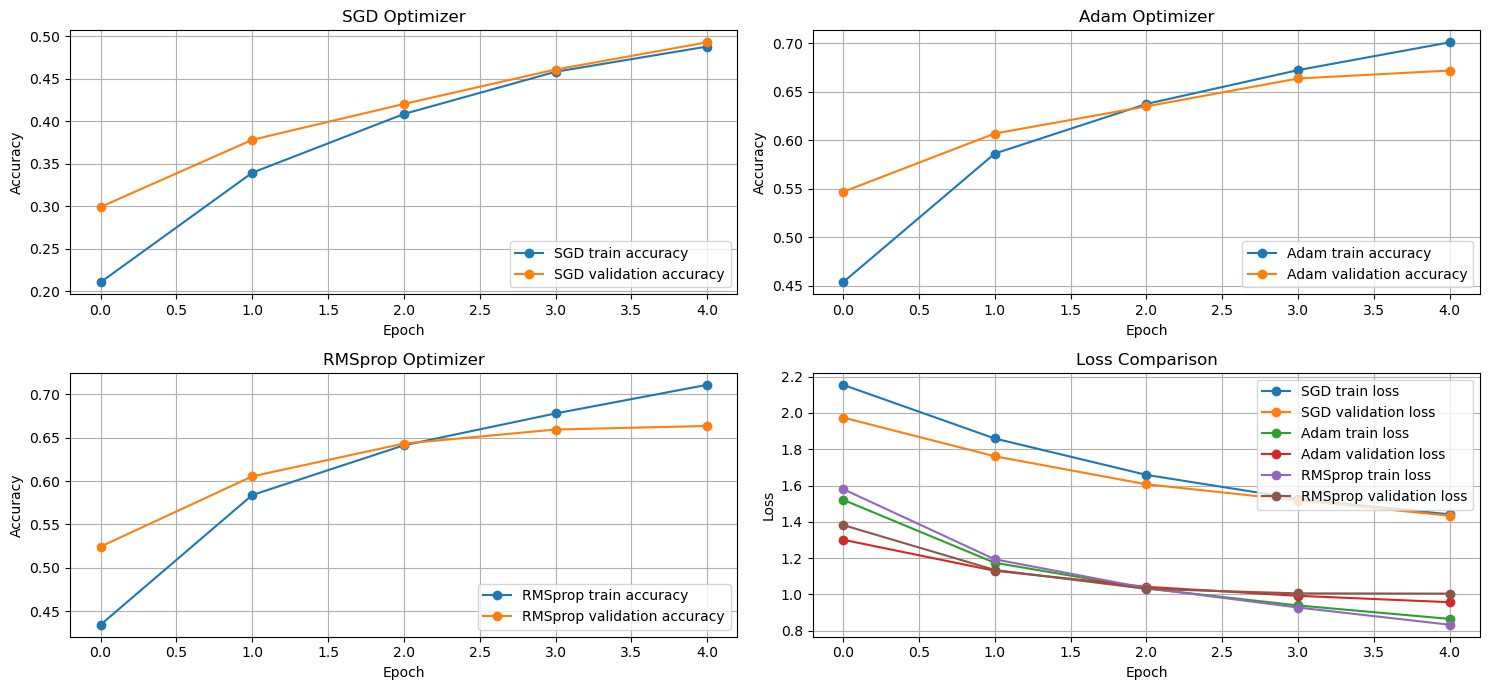

In [7]:
# Plot the accuracy for each optimizer
plt.figure(figsize=(15, 7))

# Plot the SGD accuracy
plt.subplot(2, 2, 1)
plt.plot(history_sgd.history['accuracy'], 'o-', label='SGD train accuracy')
plt.plot(history_sgd.history['val_accuracy'], 'o-', label='SGD validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')
plt.title('SGD Optimizer')

# Plot the Adam accuracy
plt.subplot(2, 2, 2)
plt.plot(history_adam.history['accuracy'], 'o-', label='Adam train accuracy')
plt.plot(history_adam.history['val_accuracy'], 'o-', label='Adam validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')
plt.title('Adam Optimizer')

# Plot the RMSprop accuracy
plt.subplot(2, 2, 3)
plt.plot(history_rmsprop.history['accuracy'], 'o-', label='RMSprop train accuracy')
plt.plot(history_rmsprop.history['val_accuracy'], 'o-', label='RMSprop validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')
plt.title('RMSprop Optimizer')

# Plot the loss for each optimizer
plt.subplot(2, 2, 4)
plt.plot(history_sgd.history['loss'], 'o-', label='SGD train loss')
plt.plot(history_sgd.history['val_loss'], 'o-', label='SGD validation loss')
plt.plot(history_adam.history['loss'], 'o-', label='Adam train loss')
plt.plot(history_adam.history['val_loss'], 'o-', label='Adam validation loss')
plt.plot(history_rmsprop.history['loss'], 'o-', label='RMSprop train loss')
plt.plot(history_rmsprop.history['val_loss'], 'o-', label='RMSprop validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')
plt.title('Loss Comparison')

plt.tight_layout()
plt.show()

RMSprop optimizer was better